In [1]:
from time import time

class Timer(object):
  def __init__(self, verbose=False):
    self.verbose = verbose  

  def __enter__(self):
    self.start = time()
    return self

  def __exit__(self, *args):
    self.end = time()
    self.secs = self.end - self.start
    self.msecs = self.secs * 1000  # millisecs
    if self.verbose:
      print 'elapsed time: %f ms' % self.msecs

In [2]:
from os import listdir
from os.path import isfile, join
docLabels = []
docLabels = [f for f in listdir("data/instagram_activities/") if '.csv' in f]

print 'documents:', len(docLabels)
print docLabels

documents: 11
['instagram_activities.csv.0', 'instagram_activities.csv.1', 'instagram_activities.csv.10', 'instagram_activities.csv.2', 'instagram_activities.csv.3', 'instagram_activities.csv.4', 'instagram_activities.csv.5', 'instagram_activities.csv.6', 'instagram_activities.csv.7', 'instagram_activities.csv.8', 'instagram_activities.csv.9']


In [5]:
import csv

data = []
for doc in docLabels:
    print 'Parsing ', doc
    with open('data/instagram_activities/' + doc, 'rb') as csvfile:
        csvReader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in csvReader:
            data.append([row[0], [str(s) for s in eval(row[1])]])

print len(data)

Parsing  instagram_activities.csv.0
Parsing  instagram_activities.csv.1
Parsing  instagram_activities.csv.10
Parsing  instagram_activities.csv.2
Parsing  instagram_activities.csv.3
Parsing  instagram_activities.csv.4
Parsing  instagram_activities.csv.5
Parsing  instagram_activities.csv.6
Parsing  instagram_activities.csv.7
Parsing  instagram_activities.csv.8
Parsing  instagram_activities.csv.9
1005459


In [6]:
import gensim

sentences = [gensim.models.doc2vec.LabeledSentence(words=doc[0].split(),tags=doc[1]) for doc in data]

In [ ]:
sentences[0]

In [ ]:
model = gensim.models.Doc2Vec(size=300, window=10, min_count=15, workers=11, alpha=0.025, min_alpha=0.025) # use fixed learning rate
model.build_vocab(sentences)

for epoch in range(10):
    with Timer() as t:
        model.train(sentences)
        model.alpha -= 0.002 # decrease the learning rate
        model.min_alpha = model.alpha # fix the learning rate, no deca
        model.train(sentences)
    print "Trainning time for epoch", epoch, "is", t.secs2

In [7]:
# model.save('1M_10epochs')

import gensim

model = gensim.models.Doc2Vec.load('1M_10epochs')

In [6]:
model.most_similar("#fashion")

[('#styleblogger', 0.46287840604782104),
 ('#chic', 0.44484537839889526),
 ('#styling', 0.43868303298950195),
 ('#musthave', 0.42052674293518066),
 ('#stylist', 0.3903328776359558),
 ('#fashiondiaries', 0.38955020904541016),
 ('#instastyle', 0.3828691244125366),
 ('#luxury', 0.3825111389160156),
 ('#vogue', 0.3796754479408264),
 ('#classy', 0.37371736764907837)]

In [7]:
model.most_similar("#traveloregon")

[('#pacificnorthwest', 0.6167587041854858),
 ('#oregonnw', 0.5623527765274048),
 ('#upperleftusa', 0.5443731546401978),
 ('#exploregon', 0.5350562334060669),
 ('#getoutdoors', 0.5323786735534668),
 ('#exploreoregon', 0.5168024301528931),
 ('#virginiaisforlovers', 0.5144643783569336),
 ('#adventure', 0.5078577995300293),
 ('#pnwonderland', 0.49604180455207825),
 ('#bestoforegon', 0.48957616090774536)]

In [8]:
model.doesnt_match('#fashion #design #store'.split())

'#store'

In [8]:
import pandas as pd

ratings = pd.read_csv('data/instagram_ratings.csv', header=None)
ratings['docvecs']     = ratings[0].apply(lambda x: model.docvecs[str(x)])
ratings['docvecs_len'] = ratings['docvecs'].apply(lambda x: len(x))

ratings = ratings[ratings['docvecs_len'] == 300]
ratings = ratings.reset_index(drop=True)

ratings.head()

,0,1,2,3,4,docvecs,docvecs_len
0,443640355416351476,False,Top off your killer look with our vintage insp...,content_not_relevant,5982,"[-0.142505, 0.0481642, -0.0550694, 0.0606493, ...",300
1,443640355416243447,False,"A stunning piece for the true global vagabond,...",content_not_relevant,5982,"[-0.0439086, -0.00913453, 0.0909323, -0.052497...",300
2,443640355416196263,False,Moon daisy mornings 🌙 wonderlandclothing.com ✨,content_not_relevant,5982,"[-0.00118915, -0.03137, -0.00607291, 0.0493308...",300
3,443640355416149938,False,Tie dye and butterflies from @gioglitter in ou...,content_not_relevant,5982,"[0.0247944, -0.109643, -0.0197312, -0.047658, ...",300
4,443640355416140376,False,"Opium Harness available now on my shop , Fully...",content_not_relevant,5982,"[0.0298661, -0.0467364, -0.0342047, -0.0701144...",300


In [ ]:
import numpy as np
from sklearn.manifold import TSNE

X = np.array(ratings[0])
X = [model.docvecs[str(x)] for x in X]

tsne = TSNE(n_components=3, random_state=0)
np.set_printoptions(suppress=True)

representation = tsne.fit_transform(X)

In [141]:
print ratings[1].loc[ratings[1] == True].index

Int64Index([   6,    9,   10,   11,   12,   13,   14,   15,   16,   17,
            ...
            3132, 3134, 3136, 3137, 3138, 3139, 3141, 3142, 3143, 3151],
           dtype='int64', length=1589)


In [158]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

# plot the result
vis_x = representation[:, 0]
vis_y = representation[:, 1]
vis_z = representation[:, 2]

print 'representation:', len(representation)
print 'ratings:', len(ratings)

representation: 3152
ratings: 3152


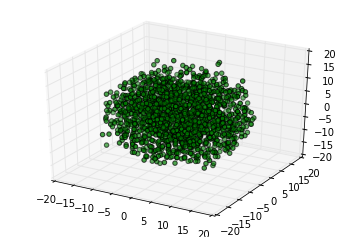

In [154]:
fig = plt.figure()

true_idxs = ratings[1].loc[ratings[1] == True].index
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vis_x[true_idxs], vis_y[true_idxs], vis_z[true_idxs], c='g')

plt.show()

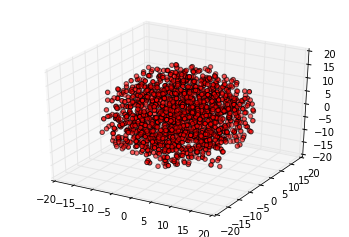

In [155]:
fig = plt.figure()

false_idxs = ratings[1].loc[ratings[1] == False].index
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vis_x[false_idxs], vis_y[false_idxs], vis_z[false_idxs], c='r')

plt.show()

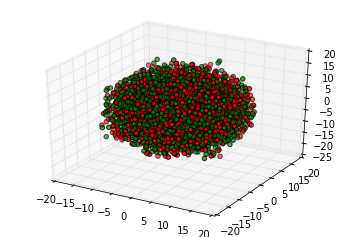

In [156]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(vis_x, vis_y, vis_z, c=[('b' if x == True else 'r') for x in ratings[1]])

plt.show()

In [9]:
def makeFeatureVec(vecs, model, num_features):
    # Function to average all of the doc vectors in a given
    # type of feedback
    #
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((num_features,),dtype="float32")
        #
    # Loop over each word in the review and, if it is in the model's
    # vocaublary, add its feature vector to the total
    for vec in vecs:
        featureVec = np.add(featureVec, vec)
    # 
    # Divide the result by the number of words to get the average
    featureVec = np.divide(featureVec,len(vecs))
    return featureVec

In [10]:
good_vec = makeFeatureVec(ratings.loc[ratings[1] == True]['docvecs'], model, 300)
bad_vec = makeFeatureVec(ratings.loc[ratings[1] == False]['docvecs'], model, 300)

NameError: global name 'np' is not defined

In [ ]:
from numpy import dot

ratings['cosine_good'] = ratings[0].apply(lambda _id: dot(model.docvecs[str(_id)], good_vec))
ratings['cosine_bad'] = ratings[0].apply(lambda _id: dot(model.docvecs[str(_id)], bad_vec))
ratings['cosine_rule'] = ratings.apply(lambda row: dot(model.docvecs['rule_' + str(row[4])], model.docvecs[row[1]]), axis=1)
ratings['cosine_rule_good'] = ratings[4].apply(lambda rule: dot(model.docvecs['rule_' + str(rule)], good_vec))
ratings['cosine_rule_bad'] = ratings[4].apply(lambda rule: dot(model.docvecs['rule_' + str(rule)], bad_vec))

fig = plt.figure()

plt.scatter(ratings['cosine_good'], ratings['cosine_bad'], c=[('g' if good else 'r') for good in ratings[1]])

plt.show()

In [276]:
import sklearn

result = ratings[ratings[1] == (ratings['cosine_good'] >= ratings['cosine_bad'])]

print sklearn.metrics.confusion_matrix(ratings[1], ratings['cosine_model'])
print 'score:', len(result)/float(len(ratings))

ValueError: Can't handle mix of binary and unknown

In [273]:
from sklearn import svm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from time import ctime

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

k_fold = KFold(n=len(X), n_folds=2, shuffle=True)
b_scores, svc_scores = [], []

#x_data = np.array(X)
x_data = np.array(ratings[['cosine_good', 'cosine_bad', 'cosine_rule', 'cosine_rule_good', 'cosine_rule_bad']].values)
y_data = np.array([(1 if x else 0) for x in ratings[1]])

for tr_indices, cv_indices in k_fold:
    tr    = x_data[tr_indices]
    cv    = x_data[cv_indices]

    tr_y  = y_data[tr_indices]
    cv_y  = y_data[cv_indices]

    clf = KNeighborsClassifier()
    
    print '- Starting:', ctime()
    clf.fit(tr, tr_y)
    print(confusion_matrix(cv_y, clf.predict(cv)))    
    print('#### SCORE:' + str(clf.score(cv, cv_y)))

- Starting: Mon Jan 18 17:46:23 2016
[[791  13]
 [ 23 749]]
#### SCORE:0.977157360406
- Starting: Mon Jan 18 17:46:23 2016
[[750   9]
 [ 25 792]]
#### SCORE:0.978426395939


In [290]:
clf = KNeighborsClassifier()
clf.fit(x_data, y_data)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [291]:
newest = pd.read_csv('data/instagram_last_activities.csv', header=None)
newest.head()

,0,1,2,3
0,443640355414011195,"Double tap the image to see the message! Then,...",https://instagram.com/p/3HDH9bhBvD/,3603
1,443640355414209709,I do! I do! How cute is this wooden greeting s...,https://instagram.com/p/3HekKchBrt/,3603
2,443640355415209472,Hello elegance! Keep everything chic with thes...,https://instagram.com/p/3Jn9BOhBvg/,3603
3,443640355415353762,We're talking all things #weddings + staying a...,https://instagram.com/p/3J5gyNBBvu/,3603
4,443640355415519184,"Connections, comfort, convenience! Click the l...",https://instagram.com/p/3KNbr7hBlE/,3603


In [301]:
_newest = newest.head(50)

_newest['cosine_good'] = _newest[1].apply(lambda body: dot(model.infer_vector(body.split()), good_vec))
_newest['cosine_bad'] = _newest[1].apply(lambda body: dot(model.infer_vector(body.split()), bad_vec))
_newest['cosine_rule'] = _newest.apply(lambda row: dot(model.docvecs['rule_' + str(row[3])], model.infer_vector(row[1].split())), axis=1)
_newest['cosine_rule_good'] = _newest[3].apply(lambda rule: dot(model.docvecs['rule_' + str(rule)], good_vec))
_newest['cosine_rule_bad'] = _newest[3].apply(lambda rule: dot(model.docvecs['rule_' + str(rule)], bad_vec))

/Users/felipeclopes/Projects/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/felipeclopes/Projects/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/felipeclopes/Projects/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [302]:
_newest.head(50)

,0,1,2,3,cosine_good,cosine_bad,cosine_rule,cosine_rule_good,cosine_rule_bad
0,443640355414011195,"Double tap the image to see the message! Then,...",https://instagram.com/p/3HDH9bhBvD/,3603,-0.000814,0.000635,0.777865,0.000896,0.004236
1,443640355414209709,I do! I do! How cute is this wooden greeting s...,https://instagram.com/p/3HekKchBrt/,3603,-0.001542,0.000356,0.443319,0.000896,0.004236
2,443640355415209472,Hello elegance! Keep everything chic with thes...,https://instagram.com/p/3Jn9BOhBvg/,3603,-0.000392,0.001937,0.499808,0.000896,0.004236
3,443640355415353762,We're talking all things #weddings + staying a...,https://instagram.com/p/3J5gyNBBvu/,3603,-0.000929,0.000693,0.252179,0.000896,0.004236
4,443640355415519184,"Connections, comfort, convenience! Click the l...",https://instagram.com/p/3KNbr7hBlE/,3603,0.000780,0.004895,0.455953,0.000896,0.004236
5,443640355415519184,"Connections, comfort, convenience! Click the l...",https://instagram.com/p/3KNbr7hBlE/,4782,0.001507,0.004756,0.526276,0.006737,0.001415
6,443640355573003555,Be careful where you selfie or Intel might put...,https://www.instagram.com/p/BANoysDMrm4/,3604,0.002365,0.006956,0.588664,0.016372,0.002637
7,443640355573027751,Everyone's a photobomber with Ricoh's Theta S ...,https://www.instagram.com/p/BANtMN0srvV/,3604,0.002770,0.003986,0.367870,0.016372,0.002637
8,443640355573435448,These toy dinosaurs are powered by IBM Watson ...,https://www.instagram.com/p/BAOTBTZsrt5/,3604,0.003288,0.000873,0.667053,0.016372,0.002637
9,443640355573988375,Looks like we've found another @TaylorSwift fa...,https://www.instagram.com/p/BAP0zvAMrjK/,3604,0.000876,0.000327,0.414309,0.016372,0.002637


In [306]:
_newest_data = np.array(_newest[['cosine_good', 'cosine_bad', 'cosine_rule', 'cosine_rule_good', 'cosine_rule_bad']].values)

_newest['predicted'] = clf.predict(_newest_data)

/Users/felipeclopes/Projects/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [307]:
_newest.head(50)

,0,1,2,3,cosine_good,cosine_bad,cosine_rule,cosine_rule_good,cosine_rule_bad,predicted
0,443640355414011195,"Double tap the image to see the message! Then,...",https://instagram.com/p/3HDH9bhBvD/,3603,-0.000814,0.000635,0.777865,0.000896,0.004236,0
1,443640355414209709,I do! I do! How cute is this wooden greeting s...,https://instagram.com/p/3HekKchBrt/,3603,-0.001542,0.000356,0.443319,0.000896,0.004236,0
2,443640355415209472,Hello elegance! Keep everything chic with thes...,https://instagram.com/p/3Jn9BOhBvg/,3603,-0.000392,0.001937,0.499808,0.000896,0.004236,1
3,443640355415353762,We're talking all things #weddings + staying a...,https://instagram.com/p/3J5gyNBBvu/,3603,-0.000929,0.000693,0.252179,0.000896,0.004236,1
4,443640355415519184,"Connections, comfort, convenience! Click the l...",https://instagram.com/p/3KNbr7hBlE/,3603,0.000780,0.004895,0.455953,0.000896,0.004236,0
5,443640355415519184,"Connections, comfort, convenience! Click the l...",https://instagram.com/p/3KNbr7hBlE/,4782,0.001507,0.004756,0.526276,0.006737,0.001415,0
6,443640355573003555,Be careful where you selfie or Intel might put...,https://www.instagram.com/p/BANoysDMrm4/,3604,0.002365,0.006956,0.588664,0.016372,0.002637,0
7,443640355573027751,Everyone's a photobomber with Ricoh's Theta S ...,https://www.instagram.com/p/BANtMN0srvV/,3604,0.002770,0.003986,0.367870,0.016372,0.002637,0
8,443640355573435448,These toy dinosaurs are powered by IBM Watson ...,https://www.instagram.com/p/BAOTBTZsrt5/,3604,0.003288,0.000873,0.667053,0.016372,0.002637,0
9,443640355573988375,Looks like we've found another @TaylorSwift fa...,https://www.instagram.com/p/BAP0zvAMrjK/,3604,0.000876,0.000327,0.414309,0.016372,0.002637,0


In [29]:
ratings['hashtags'] = ratings[2].apply(lambda x: filter(lambda x: x.startswith('#'), x.replace(',', ' ').split(' ')))

In [32]:
def doesnt_match(hashtags):
    print hashtags
    r = 0
    if len(hashtags) > 2:
        r = len(model.doesnt_match(hashtags))
    print r
    return r

ratings['doesnt_match'] = ratings['hashtags'].apply(lambda h: doesnt_match(h))

[]
0
['#trinkithunter', '#fortheoriginalgypsy', '#saltwaterwanderer', '#gypsyjewels', '#belt', '#afghani', '#tribal', '#vintage', '#artisan', '#handcrafted', '#saltwatergypsy', '#gypsy', '#gypset', '#gypsystyle', '#gypsyfashion', '#gypsygoddess', '#boho', '#bohemian', '#bohostyle', '#bohofashion', '#bohogoddess', '#beachbabe', '#festivalstyle', '#festivalfashion', '#byronbay', '#sitg15', '#splendour15']
8
[]
0
['#fashion', '#style', '#regram', '#tiedye', '#SS15', '#festivalfashion', '#tattoos', '#butterflies', '#fringing', '#fblogger', '#fbloggers', '#glamorous', '#ukglamorous']
7
['#bohochic', '#bohogirl', '#bohostyle', '#bohofashion', '#badstarlingerie', '#fashion', '#festivalstyle', '#festivalfashion', '#gypsychic', '#gypsystyle', '#hippie', '#handmade', '#hippiechic', '#hippiestyle', '#ibizastyle', '#polefitness']
12
['#grunge', '#grungestyle', '#altfashion', '#festival', '#festivalfashion', '#festivalstyle', '#blogger', '#fashionblogger', '#instablogger', '#grungeblog', '#bohogrun

ValueError: cannot select a word from an empty list